In [1]:
# Import and configuration
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from config import *

In [2]:
# Load clean data from CSV
incident_data = pd.read_csv(incidents_clean_data_path)
incident_data.head()

,Year,State Name,Number of Killed,Number of Injured,Incident Info,Latitude,Longitude,Participant Age,Participant Age Group,Participant Gender,Participant Relationship,Participant Status,Participant Type,State Abbr
0,2013,Pennsylvania,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,PA
1,2013,California,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,CA
2,2013,Ohio,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,OH
3,2013,Colorado,4,0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,CO
4,2013,North Carolina,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,NC


In [3]:
#Read in State_Star_Dict
Star_Dict = pd.read_csv(dict_path)

Star_Dict.head()

,State Name,Stars
0,Alabama,4
1,Alaska,5
2,Arizona,5
3,Arkansas,3
4,California,1


In [4]:
#Unique value count of state values so I can scatterplot against star count
incident_count = incident_data['State Name'].value_counts()
incident_count.head()

Illinois      17556
California    16306
Florida       15029
Texas         13577
Ohio          10244
Name: State Name, dtype: int64

In [5]:
#create incident count dataframe and rename columns
State_incident_count = pd.DataFrame(incident_count.reset_index())
State_incident_count.columns = ['State Name','Incident Count']
State_incident_count.head()

,State Name,Incident Count
0,Illinois,17556
1,California,16306
2,Florida,15029
3,Texas,13577
4,Ohio,10244


In [6]:
#Merge State Incident DF with Star Dict
Law_Data = pd.merge(Star_Dict, State_incident_count, how ="left", on ="State Name")
Law_Data.head()

,State Name,Stars,Incident Count
0,Alabama,4,5471
1,Alaska,5,1349
2,Arizona,5,2328
3,Arkansas,3,2842
4,California,1,16306


In [7]:
#output Law_data to .csv

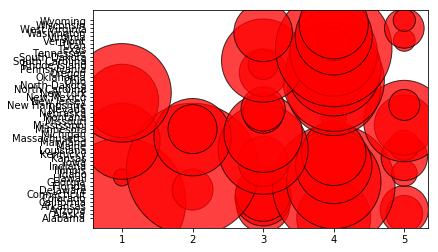

In [8]:
#Do a Scatter Plot
x_star_axis = Law_Data['Stars']
y_state_axis = Law_Data['State Name']
size_incident = Law_Data['Incident Count']
plt.scatter(x_star_axis, y_state_axis, marker="o", facecolors="red", edgecolors="black",
            s=size_incident, alpha=0.75)
plt.show()

In [9]:
Law_Data.head()
#scroll purposes

,State Name,Stars,Incident Count
0,Alabama,4,5471
1,Alaska,5,1349
2,Arizona,5,2328
3,Arkansas,3,2842
4,California,1,16306


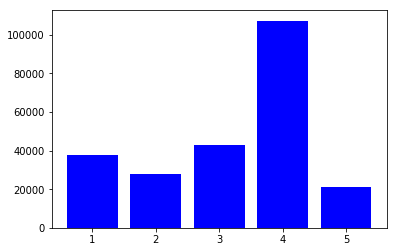

In [10]:
#make a bar chart total incidents in each gro
#twerate through each row of law data and get a total for each star group like in PyPoll
one_star_incident_count = 0
two_star_incident_count = 0
three_star_incident_count = 0
four_star_incident_count = 0
five_star_incident_count = 0

for _,row in Law_Data.iterrows():
        
        if row['Stars']== 1:
            one_star_incident_count = one_star_incident_count + row['Incident Count']
        if row['Stars']== 2:
            two_star_incident_count = two_star_incident_count + row['Incident Count']
        if row['Stars']== 3:
            three_star_incident_count = three_star_incident_count + row['Incident Count']
        if row['Stars']== 4:
            four_star_incident_count = four_star_incident_count + row['Incident Count']
        if row['Stars']== 5:
            five_star_incident_count = five_star_incident_count + row['Incident Count']

x_star_axis = [1,2,3,4,5]       
y_incident_total = [one_star_incident_count,
                    two_star_incident_count,
                    three_star_incident_count,
                    four_star_incident_count,
                    five_star_incident_count]
plt.bar(x_star_axis, y_incident_total, color="b", align="center")
plt.show()

            

In [11]:
census_info = pd.read_csv(census_path)
census_info.head()


,Geoname,State Name,Population13,Population14,Population15,Population16,Population17
0,"Alabama, Alabama, East South Central, South, U...",Alabama,4833722,4849377,4858979,4863300,4874747
1,"Alaska, Alaska, Pacific, West, United States",Alaska,735132,736732,738432,741894,739795
2,"Arizona, Arizona, Mountain, West, United States",Arizona,6626624,6731484,6828065,6931071,7016270
3,"Arkansas, Arkansas, West South Central, South,...",Arkansas,2959373,2966369,2978204,2988248,3004279
4,"California, California, Pacific, West, United ...",California,38332521,38802500,39144818,39250017,39536653


In [12]:
#just needed this for coding purposes so I don't have to keep scrolling
incident_data.head()

,Year,State Name,Number of Killed,Number of Injured,Incident Info,Latitude,Longitude,Participant Age,Participant Age Group,Participant Gender,Participant Relationship,Participant Status,Participant Type,State Abbr
0,2013,Pennsylvania,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,PA
1,2013,California,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,CA
2,2013,Ohio,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,OH
3,2013,Colorado,4,0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,CO
4,2013,North Carolina,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,NC


In [13]:
State_incident_count = incident_data[['Year','State Name']]
State_incident_count.head()

,Year,State Name
0,2013,Pennsylvania
1,2013,California
2,2013,Ohio
3,2013,Colorado
4,2013,North Carolina


In [14]:
per_cap_data = pd.merge(State_incident_count, Star_Dict, how ="left", on ="State Name")
per_cap_data.head()

,Year,State Name,Stars
0,2013,Pennsylvania,4.0
1,2013,California,1.0
2,2013,Ohio,4.0
3,2013,Colorado,3.0
4,2013,North Carolina,4.0


In [15]:
#create variables for total incidents for each star category for each year so I can use them for a per capita calculation.  
#the idea herer is that each row is a different incident.  Just like above


y2013_one_star_count = 0
y2013_two_star_count = 0
y2013_three_star_count = 0
y2013_four_star_count = 0
y2013_five_star_count = 0

y2014_one_star_count = 0
y2014_two_star_count = 0
y2014_three_star_count = 0
y2014_four_star_count = 0
y2014_five_star_count = 0

y2015_one_star_count = 0
y2015_two_star_count = 0
y2015_three_star_count = 0
y2015_four_star_count = 0
y2015_five_star_count = 0

y2016_one_star_count = 0
y2016_two_star_count = 0
y2016_three_star_count = 0
y2016_four_star_count = 0
y2016_five_star_count = 0

y2017_one_star_count = 0
y2017_two_star_count = 0
y2017_three_star_count = 0
y2017_four_star_count = 0
y2017_five_star_count = 0

y2018_one_star_count = 0
y2018_two_star_count = 0
y2018_three_star_count = 0
y2018_four_star_count = 0
y2018_five_star_count = 0

for _,row in per_cap_data.iterrows():
    
    if row['Year'] == 2013 and row["Stars"] == 1.0:
            y2013_one_star_count = y2013_one_star_count + 1
    if row['Year'] == 2013 and row["Stars"] == 2.0:
            y2013_two_star_count = y2013_two_star_count + 1
    if row['Year'] == 2013 and row["Stars"] == 3.0:
            y2013_three_star_count = y2013_three_star_count + 1
    if row['Year'] == 2013 and row["Stars"] == 4.0:
            y2013_four_star_count = y2013_four_star_count + 1
    if row['Year'] == 2013 and row["Stars"] == 5.0:
            y2013_five_star_count = y2013_five_star_count + 1
 
    if row['Year'] == 2014 and row["Stars"] == 1.0:
            y2014_one_star_count = y2014_one_star_count + 1
    if row['Year'] == 2014 and row["Stars"] == 2.0:
            y2014_two_star_count = y2014_two_star_count + 1
    if row['Year'] == 2014 and row["Stars"] == 3.0:
            y2014_three_star_count = y2014_three_star_count + 1
    if row['Year'] == 2014 and row["Stars"] == 4.0:
            y2014_four_star_count = y2014_four_star_count + 1
    if row['Year'] == 2014 and row["Stars"] == 5.0:
            y2014_five_star_count = y2014_five_star_count + 1

    if row['Year'] == 2015 and row["Stars"] == 1.0:
            y2015_one_star_count = y2015_one_star_count + 1
    if row['Year'] == 2015 and row["Stars"] == 2.0:
            y2015_two_star_count = y2015_two_star_count + 1
    if row['Year'] == 2015 and row["Stars"] == 3.0:
            y2015_three_star_count = y2015_three_star_count + 1
    if row['Year'] == 2015 and row["Stars"] == 4.0:
            y2015_four_star_count = y2015_four_star_count + 1
    if row['Year'] == 2015 and row["Stars"] == 5.0:
            y2015_five_star_count = y2015_five_star_count + 1
            
    if row['Year'] == 2016 and row["Stars"] == 1.0:
            y2016_one_star_count = y2016_one_star_count + 1
    if row['Year'] == 2016 and row["Stars"] == 2.0:
            y2016_two_star_count = y2016_two_star_count + 1
    if row['Year'] == 2016 and row["Stars"] == 3.0:
            y2016_three_star_count = y2016_three_star_count + 1
    if row['Year'] == 2016 and row["Stars"] == 4.0:
            y2016_four_star_count = y2016_four_star_count + 1
    if row['Year'] == 2016 and row["Stars"] == 5.0:
            y2016_five_star_count = y2016_five_star_count + 1
            
    if row['Year'] == 2017 and row["Stars"] == 1.0:
            y2017_one_star_count = y2017_one_star_count + 1
    if row['Year'] == 2017 and row["Stars"] == 2.0:
            y2017_two_star_count = y2017_two_star_count + 1
    if row['Year'] == 2017 and row["Stars"] == 3.0:
            y2017_three_star_count = y2017_three_star_count + 1
    if row['Year'] == 2017 and row["Stars"] == 4.0:
            y2017_four_star_count = y2017_four_star_count + 1
    if row['Year'] == 2017 and row["Stars"] == 5.0:
            y2017_five_star_count = y2017_five_star_count + 1
            
 
            

            

    

In [16]:
#A test
y2013_one_star_count

74

In [17]:
per_cap_star_pop = pd.merge(census_info, Star_Dict, how ="left", on ="State Name")
per_cap_star_pop

,Geoname,State Name,Population13,Population14,Population15,Population16,Population17,Stars
0,"Alabama, Alabama, East South Central, South, U...",Alabama,4833722,4849377,4858979,4863300,4874747,4.0
1,"Alaska, Alaska, Pacific, West, United States",Alaska,735132,736732,738432,741894,739795,5.0
2,"Arizona, Arizona, Mountain, West, United States",Arizona,6626624,6731484,6828065,6931071,7016270,5.0
3,"Arkansas, Arkansas, West South Central, South,...",Arkansas,2959373,2966369,2978204,2988248,3004279,3.0
4,"California, California, Pacific, West, United ...",California,38332521,38802500,39144818,39250017,39536653,1.0
5,"Colorado, Colorado, Mountain, West, United States",Colorado,5268367,5355866,5456574,5540545,5607154,3.0
6,"Connecticut, Connecticut, New England, Northea...",Connecticut,3596080,3596677,3590886,3576452,3588184,3.0
7,"Delaware, Delaware, South Atlantic, South, Uni...",Delaware,925749,935614,945934,952065,961939,2.0
8,"District of Columbia, District of Columbia, So...",District of Columbia,646449,658893,672228,681170,693972,NaN
9,"Florida, Florida, South Atlantic, South, Unite...",Florida,19552860,19893297,20271272,20612439,20984400,4.0


In [18]:
#Drop PuertoRico and DC and rename DF because it wouldn't let me use the same name
per_cap_star_pop_2 = per_cap_star_pop.drop([8,51])
per_cap_star_pop_2

,Geoname,State Name,Population13,Population14,Population15,Population16,Population17,Stars
0,"Alabama, Alabama, East South Central, South, U...",Alabama,4833722,4849377,4858979,4863300,4874747,4.0
1,"Alaska, Alaska, Pacific, West, United States",Alaska,735132,736732,738432,741894,739795,5.0
2,"Arizona, Arizona, Mountain, West, United States",Arizona,6626624,6731484,6828065,6931071,7016270,5.0
3,"Arkansas, Arkansas, West South Central, South,...",Arkansas,2959373,2966369,2978204,2988248,3004279,3.0
4,"California, California, Pacific, West, United ...",California,38332521,38802500,39144818,39250017,39536653,1.0
5,"Colorado, Colorado, Mountain, West, United States",Colorado,5268367,5355866,5456574,5540545,5607154,3.0
6,"Connecticut, Connecticut, New England, Northea...",Connecticut,3596080,3596677,3590886,3576452,3588184,3.0
7,"Delaware, Delaware, South Atlantic, South, Uni...",Delaware,925749,935614,945934,952065,961939,2.0
9,"Florida, Florida, South Atlantic, South, Unite...",Florida,19552860,19893297,20271272,20612439,20984400,4.0
10,"Georgia, Georgia, South Atlantic, South, Unite...",Georgia,9992167,10097343,10214860,10310371,10429379,4.0


In [19]:
#create variables for each star that has population totals

y2013_one_star_pop = 0
y2013_two_star_pop = 0
y2013_three_star_pop = 0
y2013_four_star_pop = 0
y2013_five_star_pop = 0

y2014_one_star_pop = 0
y2014_two_star_pop = 0
y2014_three_star_pop = 0
y2014_four_star_pop = 0
y2014_five_star_pop = 0

y2015_one_star_pop = 0
y2015_two_star_pop = 0
y2015_three_star_pop = 0
y2015_four_star_pop = 0
y2015_five_star_pop = 0

y2016_one_star_pop = 0
y2016_two_star_pop = 0
y2016_three_star_pop = 0
y2016_four_star_pop = 0
y2016_five_star_pop = 0

y2017_one_star_pop = 0
y2017_two_star_pop = 0
y2017_three_star_pop = 0
y2017_four_star_pop = 0
y2017_five_star_pop = 0



for _,row in per_cap_star_pop_2.iterrows():
    
    if row['Stars'] == 1.0:
        y2013_one_star_pop = y2013_one_star_pop+row["Population13"]
    if row['Stars'] == 2.0:
        y2013_two_star_pop = y2013_two_star_pop+row["Population13"]
    if row['Stars'] == 3.0:
        y2013_three_star_pop = y2013_three_star_pop+row["Population13"]
    if row['Stars'] == 4.0:
        y2013_four_star_pop = y2013_four_star_pop+row["Population13"]
    if row['Stars'] == 5.0:
        y2013_five_star_pop = y2013_five_star_pop+row["Population13"]
    
    if row['Stars'] == 1.0:
        y2014_one_star_pop = y2014_one_star_pop+row["Population14"]
    if row['Stars'] == 2.0:
        y2014_two_star_pop = y2014_two_star_pop+row["Population14"]
    if row['Stars'] == 3.0:
        y2014_three_star_pop = y2014_three_star_pop+row["Population14"]
    if row['Stars'] == 4.0:
        y2014_four_star_pop = y2014_four_star_pop+row["Population14"]
    if row['Stars'] == 5.0:
        y2014_five_star_pop = y2014_five_star_pop+row["Population14"]
    
    if row['Stars'] == 1.0:
        y2015_one_star_pop = y2015_one_star_pop+row["Population15"]
    if row['Stars'] == 2.0:
        y2015_two_star_pop = y2015_two_star_pop+row["Population15"]
    if row['Stars'] == 3.0:
        y2015_three_star_pop = y2015_three_star_pop+row["Population15"]
    if row['Stars'] == 4.0:
        y2015_four_star_pop = y2015_four_star_pop+row["Population15"]
    if row['Stars'] == 5.0:
        y2015_five_star_pop = y2015_five_star_pop+row["Population15"]
    
    if row['Stars'] == 1.0:
        y2016_one_star_pop = y2016_one_star_pop+row["Population16"]
    if row['Stars'] == 2.0:
        y2016_two_star_pop = y2016_two_star_pop+row["Population16"]
    if row['Stars'] == 3.0:
        y2016_three_star_pop = y2016_three_star_pop+row["Population16"]
    if row['Stars'] == 4.0:
        y2016_four_star_pop = y2016_four_star_pop+row["Population16"]
    if row['Stars'] == 5.0:
        y2016_five_star_pop = y2016_five_star_pop+row["Population16"]
    
    if row['Stars'] == 1.0:
        y2017_one_star_pop = y2017_one_star_pop+row["Population17"]
    if row['Stars'] == 2.0:
        y2017_two_star_pop = y2017_two_star_pop+row["Population17"]
    if row['Stars'] == 3.0:
        y2017_three_star_pop = y2017_three_star_pop+row["Population17"]
    if row['Stars'] == 4.0:
        y2017_four_star_pop = y2017_four_star_pop+row["Population17"]
    if row['Stars'] == 5.0:
        y2017_five_star_pop = y2017_five_star_pop+row["Population17"]



In [20]:
y2015_one_star_pop

75336626

In [21]:
#create incidents per capita based on star incident count across all years

y2013_one_star_per_cap = y2013_one_star_count/y2013_one_star_pop
y2013_two_star_per_cap = y2013_two_star_count/y2013_two_star_pop
y2013_three_star_per_cap = y2013_three_star_count/y2013_three_star_pop
y2013_four_star_per_cap = y2013_four_star_count/y2013_four_star_pop
y2013_five_star_per_cap = y2013_five_star_count/y2013_five_star_pop

y2014_one_star_per_cap = y2014_one_star_count/y2014_one_star_pop 
y2014_two_star_per_cap = y2014_two_star_count/y2014_two_star_pop
y2014_three_star_per_cap = y2014_three_star_count/y2014_three_star_pop
y2014_four_star_per_cap = y2014_four_star_count/y2014_four_star_pop
y2014_five_star_per_cap = y2014_five_star_count/y2014_five_star_pop

y2015_one_star_per_cap = y2015_one_star_count/y2015_one_star_pop 
y2015_two_star_per_cap = y2015_two_star_count/y2015_two_star_pop
y2015_three_star_per_cap = y2015_three_star_count/y2015_three_star_pop
y2015_four_star_per_cap = y2015_four_star_count/y2015_four_star_pop
y2015_five_star_per_cap = y2015_five_star_count/y2015_five_star_pop

y2016_one_star_per_cap = y2016_one_star_count/y2016_one_star_pop 
y2016_two_star_per_cap = y2016_two_star_count/y2016_two_star_pop
y2016_three_star_per_cap = y2016_three_star_count/y2016_three_star_pop
y2016_four_star_per_cap = y2016_four_star_count/y2016_four_star_pop
y2016_five_star_per_cap = y2016_five_star_count/y2016_five_star_pop

y2017_one_star_per_cap = y2017_one_star_count/y2017_one_star_pop 
y2017_two_star_per_cap = y2017_two_star_count/y2017_two_star_pop
y2017_three_star_per_cap = y2017_three_star_count/y2017_three_star_pop
y2017_four_star_per_cap = y2017_four_star_count/y2017_four_star_pop
y2017_five_star_per_cap = y2017_five_star_count/y2017_five_star_pop






In [22]:
y2013_one_star_per_cap

9.970915244458209e-07

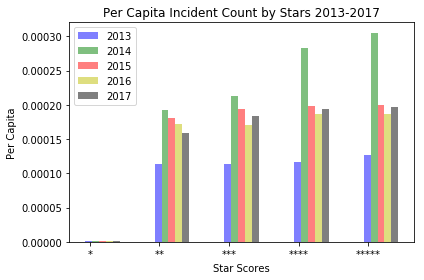

In [23]:

n_stars_cats = 5

one_star_per_caps = [y2013_one_star_per_cap,
                  y2014_one_star_per_cap,
                  y2015_one_star_per_cap,
                  y2016_one_star_per_cap,
                  y2017_one_star_per_cap]

two_star_per_caps = [y2013_two_star_per_cap,
                  y2014_two_star_per_cap,
                  y2015_two_star_per_cap,
                  y2016_two_star_per_cap,
                  y2017_two_star_per_cap]

three_star_per_caps = [y2013_three_star_per_cap,
                  y2014_three_star_per_cap,
                  y2015_three_star_per_cap,
                  y2016_three_star_per_cap,
                  y2017_three_star_per_cap]

four_star_per_caps = [y2013_four_star_per_cap,
                  y2014_four_star_per_cap,
                  y2015_four_star_per_cap,
                  y2016_four_star_per_cap,
                  y2017_four_star_per_cap]

five_star_per_caps = [y2013_five_star_per_cap,
                  y2014_five_star_per_cap,
                  y2015_five_star_per_cap,
                  y2016_five_star_per_cap,
                  y2017_five_star_per_cap]



fig,ax = plt.subplots()

index = np.arange(n_stars_cats)
bar_width = .1

opacity = 0.5
y2013_per_caps_bars = ax.bar(index,one_star_per_caps, bar_width, alpha=opacity,color='b',label='2013')
y2014_per_caps_bars = ax.bar(index + bar_width,two_star_per_caps, bar_width, alpha=opacity,color='g',label='2014')
y2015_per_caps_bars = ax.bar(index + bar_width + bar_width,three_star_per_caps, bar_width, alpha=opacity,color='r',label='2015')
y2016_per_caps_bars = ax.bar(index + bar_width + bar_width + bar_width,four_star_per_caps, bar_width, alpha=opacity,color='y',label='2016')
y2017_per_caps_bars = ax.bar(index + bar_width + bar_width + bar_width + bar_width,five_star_per_caps, bar_width, alpha=opacity,color='k',label='2017')


ax.set_xlabel('Star Scores')
ax.set_ylabel('Per Capita')#maybe change to per 100,000
ax.set_title('Per Capita Incident Count by Stars 2013-2017')
ax.set_xticks(index + bar_width / 5)
ax.set_xticklabels(('*', '**', '***', '****', '*****'))
ax.legend()

fig.tight_layout()
plt.show()



